### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

1-1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

e_df = pd.read_csv('./data/ecommerce_sales_data.csv')
e_df.head()

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국


1-2

In [2]:
e_df.isna().sum()
# 결측값이 없는것을 확인

OrderID       0
Product       0
Category      0
Quantity      0
Price         0
CustomerID    0
Birthdate     0
OrderDate     0
Country       0
dtype: int64

In [3]:
e_df.info()
# 마찬가지

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   OrderID     120 non-null    int64 
 1   Product     120 non-null    object
 2   Category    120 non-null    object
 3   Quantity    120 non-null    int64 
 4   Price       120 non-null    int64 
 5   CustomerID  120 non-null    int64 
 6   Birthdate   120 non-null    object
 7   OrderDate   120 non-null    object
 8   Country     120 non-null    object
dtypes: int64(4), object(5)
memory usage: 8.6+ KB


1-3

In [4]:
e_df['OrderDate'] = pd.to_datetime(e_df['OrderDate'])
e_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderID     120 non-null    int64         
 1   Product     120 non-null    object        
 2   Category    120 non-null    object        
 3   Quantity    120 non-null    int64         
 4   Price       120 non-null    int64         
 5   CustomerID  120 non-null    int64         
 6   Birthdate   120 non-null    object        
 7   OrderDate   120 non-null    datetime64[ns]
 8   Country     120 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 8.6+ KB


2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

2-1

In [5]:
e_df['TotalRevenue'] = e_df['Quantity'] * e_df['Price']

2-2

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7404\3880422404.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = e_df.resample('M', on='OrderDate')['TotalRevenue'].sum()


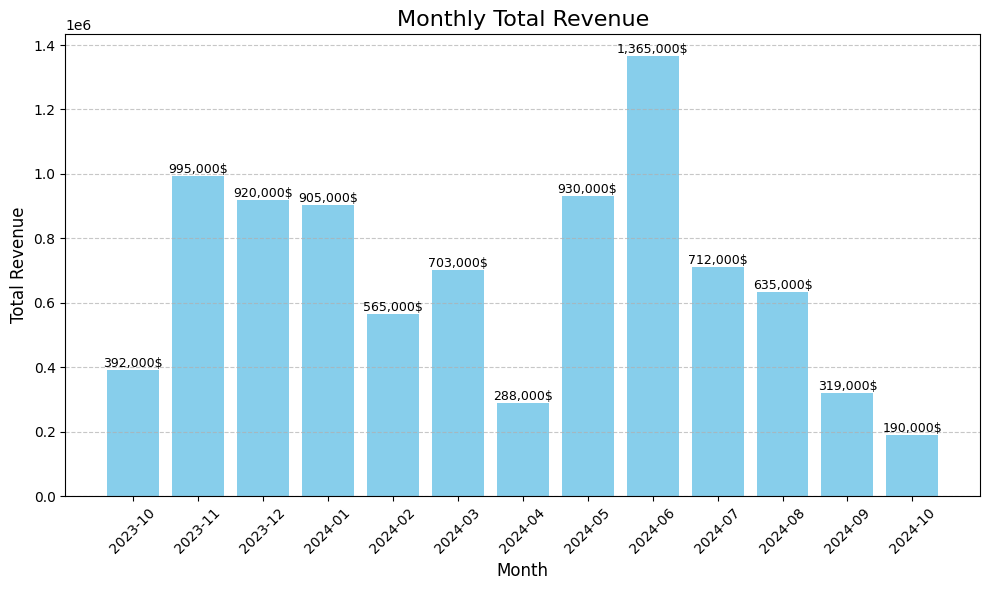

In [ ]:
monthly_revenue = e_df.resample('M', on='OrderDate')['TotalRevenue'].sum()

plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_revenue.index.strftime('%Y-%m'), monthly_revenue, color='skyblue')

# 바 상단 숫자 출력
for bar, revenue in zip(bars, monthly_revenue):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(), 
        f'{revenue:,.0f}$',
        ha='center', 
        va='bottom', 
        fontsize=9 
    )


plt.title('Monthly Total Revenue', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

2-3

In [7]:
e_df.groupby('Category')['TotalRevenue'].sum().nlargest(3)

Category
Food           1966000
Electronics    1746000
Beauty         1493000
Name: TotalRevenue, dtype: int64

2-4

In [8]:
e_df.groupby('Country')['TotalRevenue'].sum().nlargest(5)

Country
미국      2238000
독일      1973000
중국      1766000
일본      1523000
대한민국    1419000
Name: TotalRevenue, dtype: int64

3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

3-1

In [9]:
e_df.groupby('CustomerID')['TotalRevenue'].sum().nlargest(5)

CustomerID
1007    334000
1354    245000
1141    241000
1589    215000
1632    192000
Name: TotalRevenue, dtype: int64

3-2

In [10]:
e_df.groupby('CustomerID')['Product'].count().nlargest(5)

CustomerID
1007    2
1038    2
1141    2
1206    2
1278    2
Name: Product, dtype: int64

3-3

In [49]:
import random

age_groups = ['10대', '20대', '30대', '40대'] # 연령대
e_df['AgeGroup'] = [random.choice(age_groups) for _ in range(len(e_df))] # 무작위로 e_df의 length만큼 연령대 할당당

In [52]:
e_df.groupby(['AgeGroup', 'Category'])['Quantity'].sum().reset_index().sort_values(['AgeGroup', 'Quantity'], ascending=[True, False]).groupby('AgeGroup').first()

,Category,Quantity
AgeGroup,,
10대,Books,22
20대,Food,21
30대,Beauty,23
40대,Books,21


4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

4-1

In [11]:
e_df.groupby('Product')['TotalRevenue'].sum().nlargest(5).reset_index()

,Product,TotalRevenue
0,셔츠,716000
1,커피,638000
2,역사책,574000
3,초콜릿,561000
4,헤드폰,532000


4-2

In [12]:
e_df.groupby(['Category', 'Product'])['TotalRevenue'].sum().reset_index().sort_values(['Category', 'TotalRevenue'], ascending=[True, False]).groupby('Category').head(1)

,Category,Product,TotalRevenue
1,Beauty,립스틱,520000
8,Books,역사책,574000
10,Clothing,셔츠,716000
18,Electronics,헤드폰,532000
23,Food,커피,638000
25,Sports,요가매트,381000


4-3

In [13]:
e_df.groupby('Product')['TotalRevenue'].mean().nlargest(3).reset_index()

,Product,TotalRevenue
0,헤드폰,133000.0
1,커피,127600.0
2,요가매트,127000.0


5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

5-1

In [14]:
weekly_revenue = e_df.groupby(e_df['OrderDate'].dt.to_period('W'))['TotalRevenue'].sum().reset_index()
weekly_revenue['OrderDate'] = weekly_revenue['OrderDate'].dt.start_time
weekly_revenue

,OrderDate,TotalRevenue
0,2023-10-02,60000
1,2023-10-09,32000
2,2023-10-16,248000
3,2023-10-23,52000
4,2023-10-30,380000
5,2023-11-06,194000
6,2023-11-13,346000
7,2023-11-20,30000
8,2023-11-27,45000
9,2023-12-04,176000


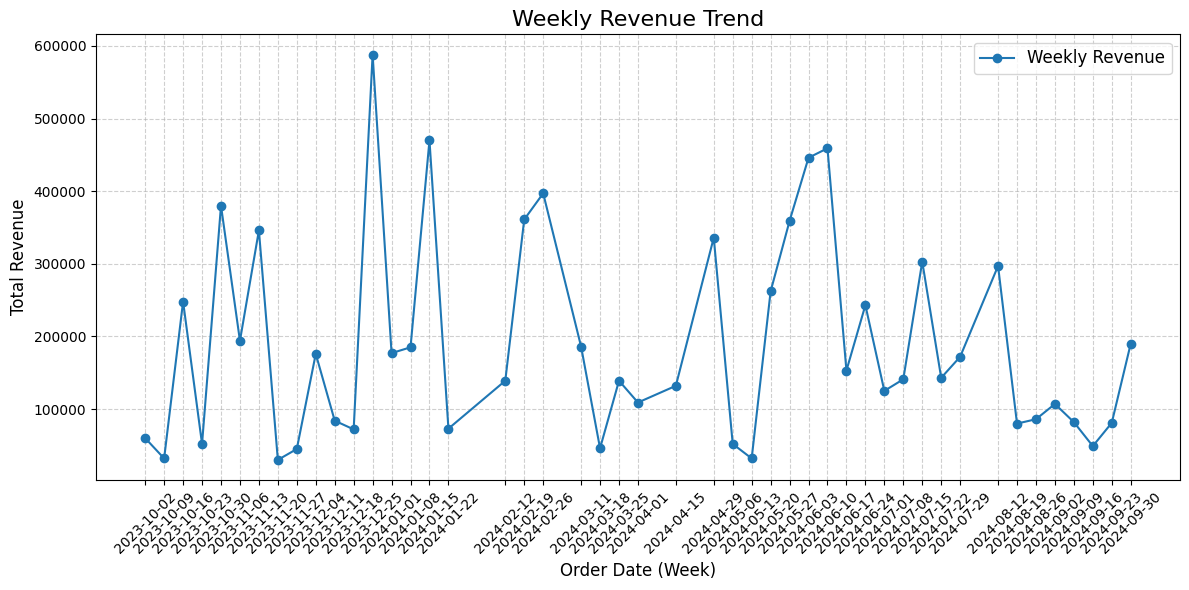

In [ ]:
# 데이터 준비
plt.figure(figsize=(12, 6))

# 라인 차트 그리기
plt.plot(weekly_revenue['OrderDate'], weekly_revenue['TotalRevenue'], marker='o', label='Weekly Revenue')

# 그래프 꾸미기
plt.title('Weekly Revenue Trend', fontsize=16)
plt.xlabel('Order Date (Week)', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(weekly_revenue['OrderDate'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

# 그래프 출력
plt.tight_layout()
plt.show()

5-2

    OrderDate  TotalRevenue
13 2024-01-01        177000
14 2024-01-08        185000
15 2024-01-15        470000
16 2024-01-22         73000
17 2024-02-12        139000
18 2024-02-19        361000
19 2024-02-26        397000
20 2024-03-11        186000
21 2024-03-18         46000
22 2024-03-25        139000
23 2024-04-01        109000
24 2024-04-15        132000
25 2024-04-29        336000
26 2024-05-06         52000
27 2024-05-13         32000
28 2024-05-20        262000
29 2024-05-27        359000
30 2024-06-03        446000
31 2024-06-10        459000
32 2024-06-17        153000
33 2024-06-24        243000


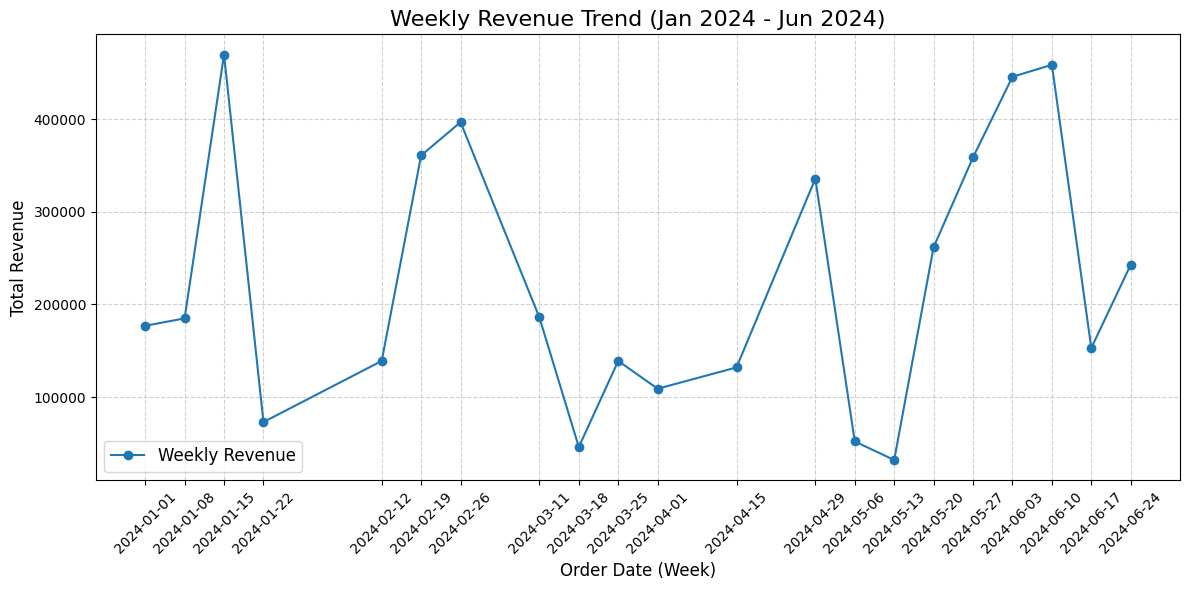

In [ ]:
filtered_revenue = weekly_revenue[(weekly_revenue['OrderDate'] >= '2024-01-01') & (weekly_revenue['OrderDate'] <= '2024-06-30')]

print(filtered_revenue)

# 추이 그래프
plt.figure(figsize=(12, 6))
plt.plot(filtered_revenue['OrderDate'], filtered_revenue['TotalRevenue'], marker='o', label='Weekly Revenue')

plt.title('Weekly Revenue Trend (Jan 2024 - Jun 2024)', fontsize=16)
plt.xlabel('Order Date (Week)', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(filtered_revenue['OrderDate'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

5-3

In [18]:
e_df['Country'].value_counts().sort_values(ascending=False)

Country
중국      28
독일      26
일본      25
미국      24
대한민국    17
Name: count, dtype: int64

**중국**

In [29]:
country_data = e_df[e_df['Country'] == '중국']

# 시간대별 주문 건수 집계
country_data['Hour'] = country_data['OrderDate'].dt.hour
hourly_orders = country_data.groupby('Hour')['OrderID'].count().reset_index()
hourly_orders.sort_values('OrderID', ascending=False) 
# 중국은 오후 11시에 가장 많은 상품이 팔림을 확인할 수 있음

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7404\2278583176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Hour'] = country_data['OrderDate'].dt.hour


,Hour,OrderID
17,23,4
6,8,3
16,20,3
0,1,2
14,17,2
2,4,2
1,2,1
5,7,1
4,6,1
3,5,1


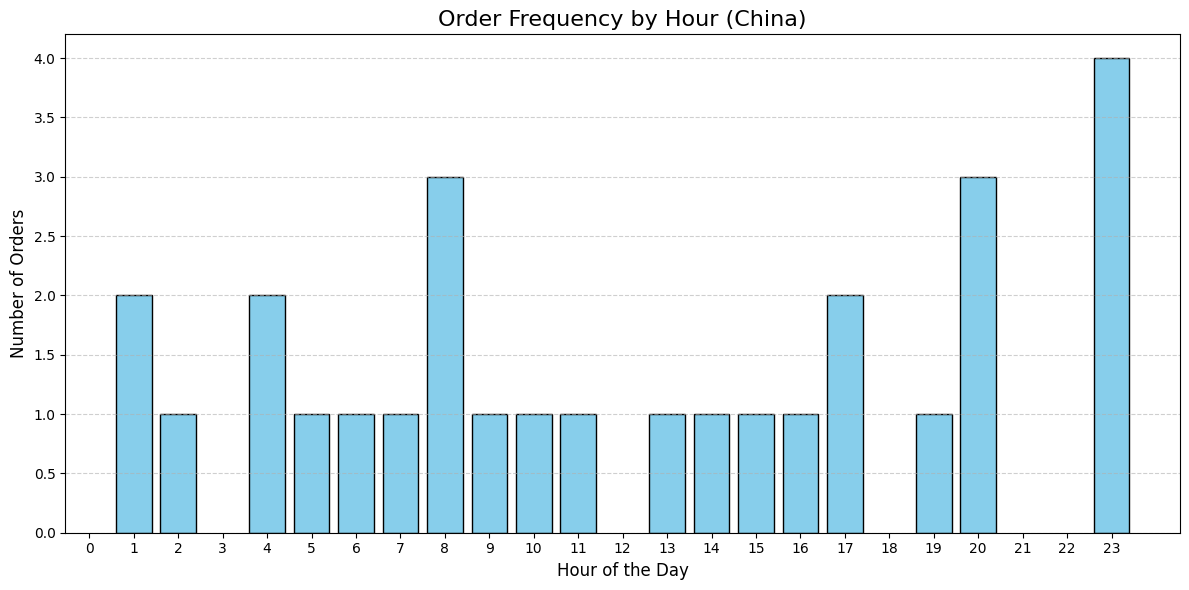

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(hourly_orders['Hour'], hourly_orders['OrderID'], color='skyblue', edgecolor='black')
plt.title('Order Frequency by Hour (China)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**독일**

In [26]:
country_data = e_df[e_df['Country'] == '독일']

# 시간대별 주문 건수 집계
country_data['Hour'] = country_data['OrderDate'].dt.hour
hourly_orders = country_data.groupby('Hour')['OrderID'].count().reset_index()
hourly_orders.sort_values('OrderID', ascending=False) 
# 독일은 오전 4시에 가장 상품 구매 수가 높다는 것을 알 수 있음

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7404\911257731.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Hour'] = country_data['OrderDate'].dt.hour


,Hour,OrderID
2,4,5
1,2,3
5,10,2
11,19,2
13,22,2
9,16,2
10,18,2
6,12,1
4,9,1
3,8,1


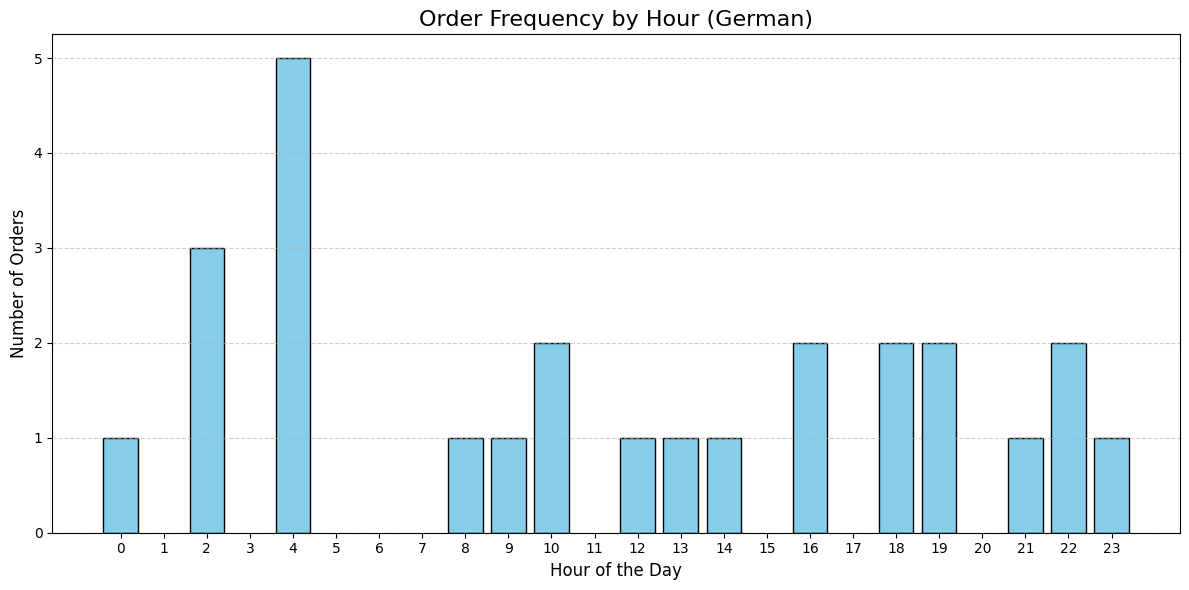

In [27]:
plt.figure(figsize=(12, 6))
plt.bar(hourly_orders['Hour'], hourly_orders['OrderID'], color='skyblue', edgecolor='black')
plt.title('Order Frequency by Hour (German)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**일본**

In [31]:
country_data = e_df[e_df['Country'] == '일본']

# 시간대별 주문 건수 집계
country_data['Hour'] = country_data['OrderDate'].dt.hour
hourly_orders = country_data.groupby('Hour')['OrderID'].count().reset_index()
hourly_orders.sort_values('OrderID', ascending=False) 
# 일본은 오전 2시, 오전 5시, 오후 7시에 가장 상품 구매 수가 높다는 것을 알 수 있음

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7404\3242322806.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Hour'] = country_data['OrderDate'].dt.hour


,Hour,OrderID
2,2,3
4,5,3
13,19,3
3,3,2
9,12,2
1,1,2
0,0,1
5,6,1
7,9,1
6,7,1


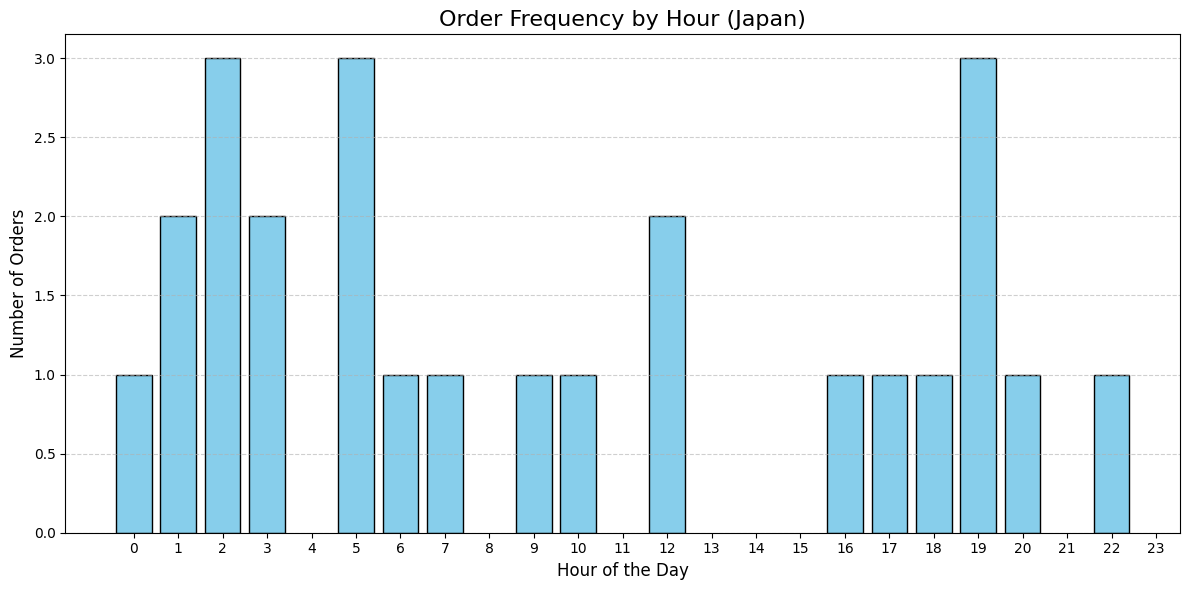

In [32]:
plt.figure(figsize=(12, 6))
plt.bar(hourly_orders['Hour'], hourly_orders['OrderID'], color='skyblue', edgecolor='black')
plt.title('Order Frequency by Hour (Japan)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**미국**

In [38]:
country_data = e_df[e_df['Country'] == '미국']

# 시간대별 주문 건수 집계
country_data['Hour'] = country_data['OrderDate'].dt.hour
hourly_orders = country_data.groupby('Hour')['OrderID'].count().reset_index()
hourly_orders.sort_values('OrderID', ascending=False) 
# 일본은 오전 1시에 가장 상품 구매 수가 높다는 것을 알 수 있음

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7404\2480186884.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Hour'] = country_data['OrderDate'].dt.hour


,Hour,OrderID
0,1,4
11,17,3
9,10,3
1,2,2
6,7,2
2,3,1
3,4,1
5,6,1
4,5,1
8,9,1


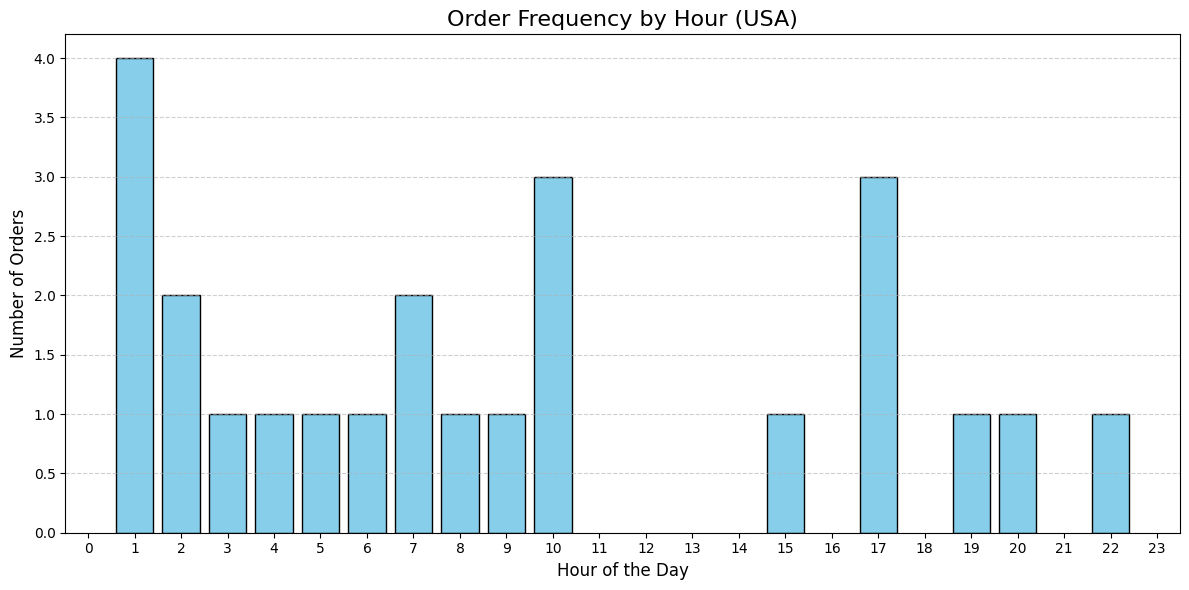

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(hourly_orders['Hour'], hourly_orders['OrderID'], color='skyblue', edgecolor='black')
plt.title('Order Frequency by Hour (USA)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**대한민국**

In [44]:
country_data = e_df[e_df['Country'] == '대한민국']

# 시간대별 주문 건수 집계
country_data['Hour'] = country_data['OrderDate'].dt.hour
hourly_orders = country_data.groupby('Hour')['OrderID'].count().reset_index()
hourly_orders.sort_values('OrderID', ascending=False) 
# 대한민국은 오전 10시에 가장 상품 구매 수가 높다는 것을 알 수 있음

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7404\1251881514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Hour'] = country_data['OrderDate'].dt.hour


,Hour,OrderID
6,10,3
12,20,2
2,5,1
3,7,1
0,1,1
1,2,1
5,9,1
4,8,1
8,13,1
7,11,1


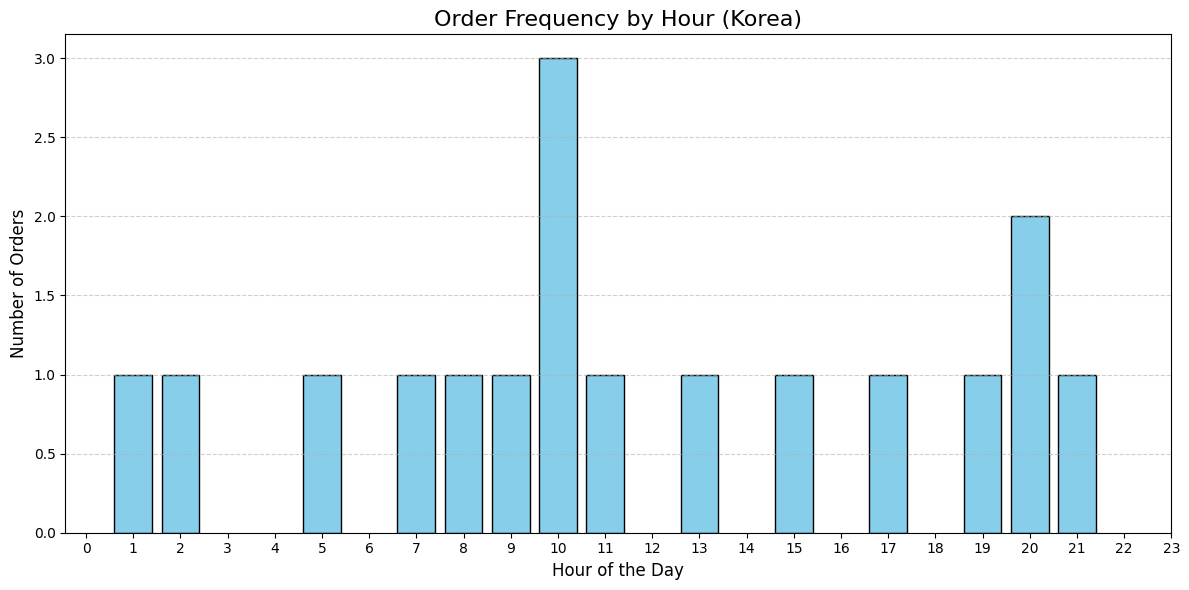

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(hourly_orders['Hour'], hourly_orders['OrderID'], color='skyblue', edgecolor='black')
plt.title('Order Frequency by Hour (Korea)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.

6-1

In [42]:
# 고객별 주문 빈도
customer_order_freq = e_df['CustomerID'].value_counts()

# 재구매 = 주문 2번 이상
re_order_customer = customer_order_freq[customer_order_freq >= 2]

# 전체 고객 수
tot_customer = len(customer_order_freq)

# 재구매한 고객 수
re_order_customer_count = len(re_order_customer)

# 재구매율 계산
repurchase_rate = re_order_customer_count / tot_customer

print(f"재구매율: {repurchase_rate * 100: .2f}%")

재구매율:  8.11%


6-2

In [48]:
# 할인율
e_df['DiscountRate'] = ((e_df['TotalRevenue'] - e_df['Price']) / e_df['Price']) * 100

# 카테고리별 평균 할인율
category_discount_mean = e_df.groupby('Category')['DiscountRate'].mean()

# 카테고리별 총 매출액
category_sales = e_df.groupby('Category')['TotalRevenue'].sum()

# 내림차순
sorted_discount_categories = category_discount_mean.sort_values(ascending=False)

# 할인율이 높은 카테고리의 매출액
high_discout_category_sales = category_sales.loc[sorted_discount_categories.index]

print(high_discout_category_sales)

Category
Electronics    1746000
Clothing       1279000
Books          1378000
Food           1966000
Beauty         1493000
Sports         1057000
Name: TotalRevenue, dtype: int64
